In [2]:
from IPython.core.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
%run jswlab-projects/05.RicinLibraryAnalysis/analyzeCrispricin.py

## Loading reference tables

In [3]:
cloningTable = pd.read_csv('Doubles_Libraries/CRISPRa_try1_cloningtable.txt', sep='\t', header=None)
cloningTable.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1581,AHR_-_17338168.23-P1P2,AHR_-_17338168.23-P1P2,Y,NaN,GGGAATGGAATCCAGATGGG,ATACAACCAGTTTTTC,AGGAGCGCCTAGTGGG,pLG18,1581,392,3.826530612
1,1582,AHR_-_17338164.23-P1P2,AHR_-_17338164.23-P1P2,Y,NaN,GAGACGGAATGGAATCCAGA,GTGTGGACACAGGAAT,TGGTCGCTAGAGGGAT,pLG18,1582,482,3.112033195
2,1583,ARID1A_+_27022167.23-P1P2,ARID1A_+_27022167.23-P1P2,Y,NaN,GCCGCCTGGCAAACCCGGAG,ACAAATAAACTCCAGA,GAAATACGGCAATTCT,pLG18,1583,572,2.622377622
3,1584,ARID1A_-_27022243.23-P1P2,ARID1A_-_27022243.23-P1P2,Y,NaN,GGCCTCGTGTCGGAGTGAGG,GATCCCCAGCCATTCT,AATAGCCTTCACTACT,pLG18,1584,603,2.487562189
4,1585,ARRDC3_-_90679309.23-P1P2,ARRDC3_-_90679309.23-P1P2,Y,NaN,GGTACAGTAGGTGTAGAGCT,ATAGTTAAACGCTAAT,CGTAGGAGAGGCTAAT,pLG18,1585,386,3.886010363


In [4]:
#Convert RHOXF2 to F2B to be with consistent with perturb-seq nomenclature
cloningTable.loc[cloningTable[1].apply(lambda val: val.split('_')[0] == 'RHOXF2')]

,0,1,2,3,4,5,6,7,8,9,10,11
170,1751,RHOXF2_+_119292286.23-ENST00000371388.3,RHOXF2_+_119292286.23-ENST00000371388.3,Y,NaN,GCATGCGTTGTCCTGTAGAC,AGACAACATATGCGGG,GTAAAACGACGGCCTC,pLG18,1751,486,3.086419753
171,1752,RHOXF2_+_119292271.23-ENST00000371388.3,RHOXF2_+_119292271.23-ENST00000371388.3,Y,NaN,GAGACAGGCATGCGTGAGTG,CTCTTGTCTTCGGCCA,ATGCTCCACGTCAACT,pLG18,1752,231,6.493506494


In [5]:
cloningTable.loc[170, 1] = 'RHOXF2B_-_119211886.23-ENST00000371402.2'
cloningTable.loc[170, 2] = 'RHOXF2B_-_119211886.23-ENST00000371402.2'
cloningTable.loc[171, 1] = 'RHOXF2B_-_119211901.23-ENST00000371402.2'
cloningTable.loc[171, 2] = 'RHOXF2B_-_119211901.23-ENST00000371402.2'

In [6]:
cloningTable.to_csv('Doubles_Libraries/CRISPRa_final_analysis/20181019_CRISPRa_cloningtable.txt', sep='\t', header=None, index=False)

In [7]:
crispraTable = pd.read_csv('Doubles_Libraries/CRISPRa_final_analysis/20181019_CRISPRa_cloningtable.txt', sep='\t', header=None).iloc[:, [0,1,5,6,7]]
crispraTable.columns = [
    'id',
    'sgId',
    'sgRNA sequence',
    'upstream barcode',
    'downstream barcode',
]
crispraTable.head()

,id,sgId,sgRNA sequence,upstream barcode,downstream barcode
0,1581,AHR_-_17338168.23-P1P2,GGGAATGGAATCCAGATGGG,ATACAACCAGTTTTTC,AGGAGCGCCTAGTGGG
1,1582,AHR_-_17338164.23-P1P2,GAGACGGAATGGAATCCAGA,GTGTGGACACAGGAAT,TGGTCGCTAGAGGGAT
2,1583,ARID1A_+_27022167.23-P1P2,GCCGCCTGGCAAACCCGGAG,ACAAATAAACTCCAGA,GAAATACGGCAATTCT
3,1584,ARID1A_-_27022243.23-P1P2,GGCCTCGTGTCGGAGTGAGG,GATCCCCAGCCATTCT,AATAGCCTTCACTACT
4,1585,ARRDC3_-_90679309.23-P1P2,GGTACAGTAGGTGTAGAGCT,ATAGTTAAACGCTAAT,CGTAGGAGAGGCTAAT


In [8]:
crispraTable.to_csv('Doubles_Libraries/CRISPRa_final_analysis/20181019_CRISPRa_guides.txt',sep='\t')

In [9]:
doublesTable = []
for i, (ind1, row1) in enumerate(crispraTable.dropna().iterrows()):
    doublesRows = []
    for j, (ind2, row2) in enumerate(crispraTable.dropna().iterrows()):
        doublesRows.append({'combined name':row1.loc['sgId']+'++'+row2.loc['sgId'],
                            'name_a':row1.loc['sgId'],
                            'name_b':row2.loc['sgId'],
                            'gene_a':row1.loc['sgId'].split('_')[0],
                            'gene_b':row2.loc['sgId'].split('_')[0],
                            'protospace sequence_a':row1.loc['sgRNA sequence'],
                            'protospace sequence_a':row2.loc['sgRNA sequence'],
                            'upstream barcode_a':row1.loc['upstream barcode'],
                            'upstream barcode_b':row2.loc['upstream barcode'],
                            'downstream barcode_a':row1.loc['downstream barcode'],
                            'downstream barcode_b':row2.loc['downstream barcode']})
        
    doublesTable.append(pd.DataFrame(doublesRows))
    
    if i%100 == 0:
        print i
    
doublesTable = pd.concat(doublesTable).set_index('combined name')
doublesTable.head()

0
100
200


,downstream barcode_a,downstream barcode_b,gene_a,gene_b,name_a,name_b,protospace sequence_a,upstream barcode_a,upstream barcode_b
combined name,,,,,,,,,
AHR_-_17338168.23-P1P2++AHR_-_17338168.23-P1P2,AGGAGCGCCTAGTGGG,AGGAGCGCCTAGTGGG,AHR,AHR,AHR_-_17338168.23-P1P2,AHR_-_17338168.23-P1P2,GGGAATGGAATCCAGATGGG,ATACAACCAGTTTTTC,ATACAACCAGTTTTTC
AHR_-_17338168.23-P1P2++AHR_-_17338164.23-P1P2,AGGAGCGCCTAGTGGG,TGGTCGCTAGAGGGAT,AHR,AHR,AHR_-_17338168.23-P1P2,AHR_-_17338164.23-P1P2,GAGACGGAATGGAATCCAGA,ATACAACCAGTTTTTC,GTGTGGACACAGGAAT
AHR_-_17338168.23-P1P2++ARID1A_+_27022167.23-P1P2,AGGAGCGCCTAGTGGG,GAAATACGGCAATTCT,AHR,ARID1A,AHR_-_17338168.23-P1P2,ARID1A_+_27022167.23-P1P2,GCCGCCTGGCAAACCCGGAG,ATACAACCAGTTTTTC,ACAAATAAACTCCAGA
AHR_-_17338168.23-P1P2++ARID1A_-_27022243.23-P1P2,AGGAGCGCCTAGTGGG,AATAGCCTTCACTACT,AHR,ARID1A,AHR_-_17338168.23-P1P2,ARID1A_-_27022243.23-P1P2,GGCCTCGTGTCGGAGTGAGG,ATACAACCAGTTTTTC,GATCCCCAGCCATTCT
AHR_-_17338168.23-P1P2++ARRDC3_-_90679309.23-P1P2,AGGAGCGCCTAGTGGG,CGTAGGAGAGGCTAAT,AHR,ARRDC3,AHR_-_17338168.23-P1P2,ARRDC3_-_90679309.23-P1P2,GGTACAGTAGGTGTAGAGCT,ATACAACCAGTTTTTC,ATAGTTAAACGCTAAT


In [11]:
doublesTable.to_csv('Doubles_Libraries/CRISPRa_final_analysis/20181019_CRISPRa_doublestable.txt',sep='\t')

## Aligning sequencing data to reference tables
#### Done in command line using custom scripts in GI analysis tools package, output copied below
#### Triple sequencing output as R1 and R2 containing upstream and downstream sgRNAs, respectively, and R3 containing reverse-complement of barcodes

In [ ]:
Logging to python.0.out ...
----[start: Fri Oct 19 11:58:09 PDT 2018 ]------------------------------------
Starting job python ../../jswlab-projects/10.Doubles_processing/tripleseq_fastqgz_to_counts_adjfiltering_161015_primerset.py 20181019_CRISPRa_cloningtable.txt all_counts/ /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_cyc_07082016_S2_L001_R1_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_cyc_07082016_S2_L001_R2_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_cyc_07082016_S2_L001_R3_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_cyc_07082016_S2_L002_R1_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_cyc_07082016_S2_L002_R2_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_cyc_07082016_S2_L002_R3_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_t0_07082016_S1_L001_R1_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_t0_07082016_S1_L001_R2_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_t0_07082016_S1_L001_R3_001.fastq.gz /home/mhorlbeck/160820B_Weissm
 an/LG13/
 GI-A_PE_rep1_t0_07082016_S1_L002_R1_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_t0_07082016_S1_L002_R2_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_t0_07082016_S1_L002_R3_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_cyc_07082016_S4_L001_R1_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_cyc_07082016_S4_L001_R2_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_cyc_07082016_S4_L001_R3_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_cyc_07082016_S4_L002_R1_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_cyc_07082016_S4_L002_R2_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_cyc_07082016_S4_L002_R3_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_t0_07082016_S3_L001_R1_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_t0_07082016_S3_L001_R2_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_t0_07082016_S
 3_L001_R
 3_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_t0_07082016_S3_L002_R1_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_t0_07082016_S3_L002_R2_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_t0_07082016_S3_L002_R3_001.fastq.gz...
sgRNAs in library 239
/home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_cyc_07082016_S2_L001_R1_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_cyc_07082016_S2_L001_R2_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_cyc_07082016_S2_L001_R3_001.fastq.gz all_counts/GI-A_PE_rep1_cyc_07082016_S2_L001
/home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_cyc_07082016_S2_L002_R1_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_cyc_07082016_S2_L002_R2_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_cyc_07082016_S2_L002_R3_001.fastq.gz all_counts/GI-A_PE_rep1_cyc_07082016_S2_L002
/home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_t0_07082016_S1_L001_R1_001.fastq.gz  /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_t0_07082016_S1_L001_R2_001.fastq.gz  /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_t0_07082016_S1_L001_R3_001.fastq.gz  all_counts/GI-A_PE_rep1_t0_07082016_S1_L001
/home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_t0_07082016_S1_L002_R1_001.fastq.gz  /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_t0_07082016_S1_L002_R2_001.fastq.gz  /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep1_t0_07082016_S1_L002_R3_001.fastq.gz  all_counts/GI-A_PE_rep1_t0_07082016_S1_L002
/home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_cyc_07082016_S4_L001_R1_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_cyc_07082016_S4_L001_R2_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_cyc_07082016_S4_L001_R3_001.fastq.gz all_counts/GI-A_PE_rep2_cyc_07082016_S4_L001
/home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_cyc_07082016_S4_L002_R1_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_cyc_07082016_S4_L002_R2_001.fastq.gz /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_cyc_07082016_S4_L002_R3_001.fastq.gz all_counts/GI-A_PE_rep2_cyc_07082016_S4_L002
/home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_t0_07082016_S3_L001_R1_001.fastq.gz  /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_t0_07082016_S3_L001_R2_001.fastq.gz  /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_t0_07082016_S3_L001_R3_001.fastq.gz  all_counts/GI-A_PE_rep2_t0_07082016_S3_L001
/home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_t0_07082016_S3_L002_R1_001.fastq.gz  /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_t0_07082016_S3_L002_R2_001.fastq.gz  /home/mhorlbeck/160820B_Weissman/LG13/GI-A_PE_rep2_t0_07082016_S3_L002_R3_001.fastq.gz  all_counts/GI-A_PE_rep2_t0_07082016_S3_L002
all_counts/GI-A_PE_rep2_cyc_07082016_S4_L001 22709517 reads
Percent A sgRNAs mapping 99.8056982013
Percent B sgRNAs mapping 99.8056982013
Percent A barcodes mapping 81.1024954868
Percent B barcodes mapping 84.0697756804
Percent all sgRNAs mapping 75.1648306743
--percent A sgRNA and barcode mismatch 3.87672917361
--percent B sgRNA and barcode mismatch 15.3107547525
--percent both A and B match 81.6308495176
Total percent matching and mapping reads 61.3576898179
all_counts/GI-A_PE_rep2_cyc_07082016_S4_L002 22985291 reads
Percent A sgRNAs mapping 99.8217729765
Percent B sgRNAs mapping 99.8217729765
Percent A barcodes mapping 83.9515366588
Percent B barcodes mapping 86.4863925369
Percent all sgRNAs mapping 78.8078428069
--percent A sgRNA and barcode mismatch 3.87565851609
--percent B sgRNA and barcode mismatch 15.3052531349
--percent both A and B match 81.6346247907
Total percent matching and mapping reads 64.3344867811
all_counts/GI-A_PE_rep1_t0_07082016_S1_L002 25081988 reads
Percent A sgRNAs mapping 99.8302128205
Percent B sgRNAs mapping 99.8302128205
Percent A barcodes mapping 82.7926279209
Percent B barcodes mapping 85.3824465589
Percent all sgRNAs mapping 77.7027163876
--percent A sgRNA and barcode mismatch 4.08925658304
--percent B sgRNA and barcode mismatch 16.1338022655
--percent both A and B match 80.6687650396
Total percent matching and mapping reads 62.6818217121
all_counts/GI-A_PE_rep1_t0_07082016_S1_L001 24727640 reads
Percent A sgRNAs mapping 99.8117450756
Percent B sgRNAs mapping 99.8117450756
Percent A barcodes mapping 79.992207101
Percent B barcodes mapping 82.9906897706
Percent all sgRNAs mapping 74.1077555319
--percent A sgRNA and barcode mismatch 4.08914571212
--percent B sgRNA and barcode mismatch 16.1366768059
--percent both A and B match 80.6644973651
Total percent matching and mapping reads 59.7786485083
all_counts/GI-A_PE_rep1_cyc_07082016_S2_L002 26250621 reads
Percent A sgRNAs mapping 99.76624553
Percent B sgRNAs mapping 99.76624553
Percent A barcodes mapping 83.2835992718
Percent B barcodes mapping 85.798153118
Percent all sgRNAs mapping 78.1467836513
--percent A sgRNA and barcode mismatch 3.93705454846
--percent B sgRNA and barcode mismatch 15.5437872331
--percent both A and B match 81.3573656177
Total percent matching and mapping reads 63.5781644937
all_counts/GI-A_PE_rep1_cyc_07082016_S2_L001 26091271 reads
Percent A sgRNAs mapping 99.7499393571
Percent B sgRNAs mapping 99.7499393571
Percent A barcodes mapping 80.4755736123
Percent B barcodes mapping 83.4242494358
Percent all sgRNAs mapping 74.5366410092
--percent A sgRNA and barcode mismatch 3.94935980905
--percent B sgRNA and barcode mismatch 15.5508581361
--percent both A and B match 81.3415793048
Total percent matching and mapping reads 60.6292809576
all_counts/GI-A_PE_rep2_t0_07082016_S3_L002 29351686 reads
Percent A sgRNAs mapping 99.811506569
Percent B sgRNAs mapping 99.811506569
Percent A barcodes mapping 80.9586338584
Percent B barcodes mapping 83.6185934941
Percent all sgRNAs mapping 75.7370973511
--percent A sgRNA and barcode mismatch 4.07029833179
--percent B sgRNA and barcode mismatch 15.9200795857
--percent both A and B match 80.8911469869
Total percent matching and mapping reads 61.2646067418
all_counts/GI-A_PE_rep2_t0_07082016_S3_L001 29000591 reads
Percent A sgRNAs mapping 99.7970765492
Percent B sgRNAs mapping 99.7970765492
Percent A barcodes mapping 78.143721278
Percent B barcodes mapping 81.2035037493
Percent all sgRNAs mapping 72.1835151566
--percent A sgRNA and barcode mismatch 4.07201879692
--percent B sgRNA and barcode mismatch 15.9132718686
--percent both A and B match 80.892439855
Total percent matching and mapping reads 58.3910065833
--------------------------------------[end: Fri Oct 19 12:21:47 PDT 2018 ]----

In [10]:
import os

In [12]:
countsCols = []
countsFilenames = []
for countsFile in os.listdir('Doubles_Libraries/CRISPRa_final_analysis/all_counts/'):
    countsCols.append(pd.read_csv('Doubles_Libraries/CRISPRa_final_analysis/all_counts/' + countsFile, sep = '\t', header=None, index_col=0))
    countsFilenames.append(countsFile)
    
countsTable = pd.concat(countsCols, keys=countsFilenames, axis=1).reorder_levels((1,0), axis=1)
countsTable.head()

1  \
                                                  GI-A_PE_rep2_cyc_07082016_S4_L001.sgRNA.counts.txt   
AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2                                                    14   
AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2                                                    74   
AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2                                                 53   
AHR_-_17338164.23-P1P2++ARID1A_-_27022243.23-P1P2                                                 28   
AHR_-_17338164.23-P1P2++ARRDC3_+_90679525.23-P1P2                                                 63   

                                                                                                        \
                                                  GI-A_PE_rep2_cyc_07082016_S4_L001.barcode.counts.txt   
AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2                                                    19     
AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2                                                    76     
AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2                                                 57     
AHR_-_17338164.23-P1P2++ARID1A_-_27022243.23-P1P2                                                 22     
AHR_-_17338164.23-P1P2++ARRDC3_+_90679525.23-P1P2                                                 49     

                                                                                                          \
                                                  GI-A_PE_rep2_cyc_07082016_S4_L001.tripleseq.counts.txt   
AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2                                                    12       
AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2                                                    38       
AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2                                                 29       
AHR_-_17338164.23-P1P2++ARID1A_-_27022243.23-P1P2                                                 21       
AHR_-_17338164.23-P1P2++ARRDC3_+_90679525.23-P1P2                                                 23       

                                                                                                      \
                                                  GI-A_PE_rep2_cyc_07082016_S4_L002.sgRNA.counts.txt   
AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2                                                    15   
AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2                                                    93   
AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2                                                 56   
AHR_-_17338164.23-P1P2++ARID1A_-_27022243.23-P1P2                                                 18   
AHR_-_17338164.23-P1P2++ARRDC3_+_90679525.23-P1P2                                                 77   

                                                                                                        \
                                                  GI-A_PE_rep2_cyc_07082016_S4_L002.barcode.counts.txt   
AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2                                                    23     
AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2                                                    88     
AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2                                                 63     
AHR_-_17338164.23-P1P2++ARID1A_-_27022243.23-P1P2                                                 18     
AHR_-_17338164.23-P1P2++ARRDC3_+_90679525.23-P1P2                                                 58     

                                                                                                          \
                                                  GI-A_PE_rep2_cyc_07082016_S4_L002.tripleseq.counts.txt   
AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2                                                     9       
AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2                            

In [14]:
colTups = []
for (n, colname), col in countsTable.iteritems():
    colTups.append((colname.split('.')[1], colname.split('_')[3], colname.split('_')[2], colname.split('_')[-1][:4]))
    
countsTable.columns = pd.MultiIndex.from_tuples(colTups)
countsTable.head()

,sgRNA,barcode,tripleseq,sgRNA,barcode,tripleseq,sgRNA,barcode,tripleseq,sgRNA,...,tripleseq,sgRNA,barcode,tripleseq,sgRNA,barcode,tripleseq,sgRNA,barcode,tripleseq
,cyc,cyc,cyc,cyc,cyc,cyc,t0,t0,t0,t0,...,cyc,cyc,cyc,cyc,t0,t0,t0,t0,t0,t0
,rep2,rep2,rep2,rep2,rep2,rep2,rep1,rep1,rep1,rep1,...,rep1,rep1,rep1,rep1,rep2,rep2,rep2,rep2,rep2,rep2
,L001,L001,L001,L002,L002,L002,L002,L002,L002,L001,...,L002,L001,L001,L001,L002,L002,L002,L001,L001,L001
AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2,14,19,12,15,23,9,177,182,112,195,...,15,33,47,22,262,232,178,225,201,127
AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2,74,76,38,93,88,49,397,292,254,407,...,118,139,103,97,430,314,267,416,305,252
AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2,53,57,29,56,63,31,251,220,153,230,...,24,33,42,24,351,321,234,332,260,186
AHR_-_17338164.23-P1P2++ARID1A_-_27022243.23-P1P2,28,22,21,18,18,16,324,235,190,293,...,6,15,26,8,311,236,181,295,231,176
AHR_-_17338164.23-P1P2++ARRDC3_+_90679525.23-P1P2,63,49,23,77,58,39,249,189,159,246,...,54,68,63,42,388,248,200,345,247,197


In [15]:
summedCountsTable = countsTable.fillna(0).groupby(level=(0,1,2), axis=1).agg(np.sum)

In [16]:
summedCountsTable.sum()

barcode    cyc  rep1    40178735
                rep2    35379147
           t0   rep1    38014088
                rep2    43398919
sgRNA      cyc  rep1    51015402
                rep2    44859002
           t0   rep1    48651439
                rep2    56884278
tripleseq  cyc  rep1    32508613
                rep2    28721504
           t0   rep1    30503696
                rep2    34915932
dtype: float64

In [17]:
summedCountsTable.mean()

barcode    cyc  rep1     721.199314
                rep2     635.047782
           t0   rep1     682.344384
                rep2     779.000897
sgRNA      cyc  rep1     915.715065
                rep2     805.209061
           t0   rep1     873.282458
                rep2    1021.060078
tripleseq  cyc  rep1     583.522338
                rep2     515.544578
           t0   rep1     547.534526
                rep2     626.733177
dtype: float64

In [18]:
summedCountsTable = summedCountsTable.loc[doublesTable.index].fillna(0)
summedCountsTable.to_csv('Doubles_Libraries/CRISPRa_final_analysis/20181019_CRISPRa_summed_counts.txt',sep='\t')

## Calculate phenotypes and GIs from raw counts

In [21]:
## Growth values
growthValues = {
'CRISPRi K562 Rep1': 6.91,
'CRISPRi K562 Rep2': 7.61,
'CRISPRi Jurkat Rep1': 6.151474054,
'CRISPRi Jurkat Rep2': 6.440885887,
'CRISPRa Rep1': 8.079146849,
'CRISPRa Rep2': 8.322110808}

In [23]:
%run jswlab-projects/10.Doubles_processing/GImap_analysis.py

In [24]:
log2es_rep1 = calcLog2e_cycledonly(summedCountsTable[('tripleseq','t0','rep1')],
                                   summedCountsTable[('tripleseq','cyc','rep1')],
                                   doublesTable,
                                   filterThreshold=15,
                                   pseudocount=10,
                                  doublingDifferences=growthValues['CRISPRa Rep1'])

51984 pairs of 57121 passing filter


In [25]:
log2es_rep2 = calcLog2e_cycledonly(summedCountsTable[('tripleseq','t0','rep2')],
                                   summedCountsTable[('tripleseq','cyc','rep2')],
                                   doublesTable,
                                   filterThreshold=15,
                                   pseudocount=10,
                                  doublingDifferences=growthValues['CRISPRa Rep2'])

51984 pairs of 57121 passing filter


In [26]:
sgIntersect = set(log2es_rep1.index).intersection(log2es_rep2.index)
print len(sgIntersect)
log2es_repave = ((log2es_rep1 + log2es_rep2) / 2).loc[sgIntersect]

51984


/home/mhorlbeck/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Doubles_Libraries/figs_part2/png/002741fig_replicate_phenotypes.png


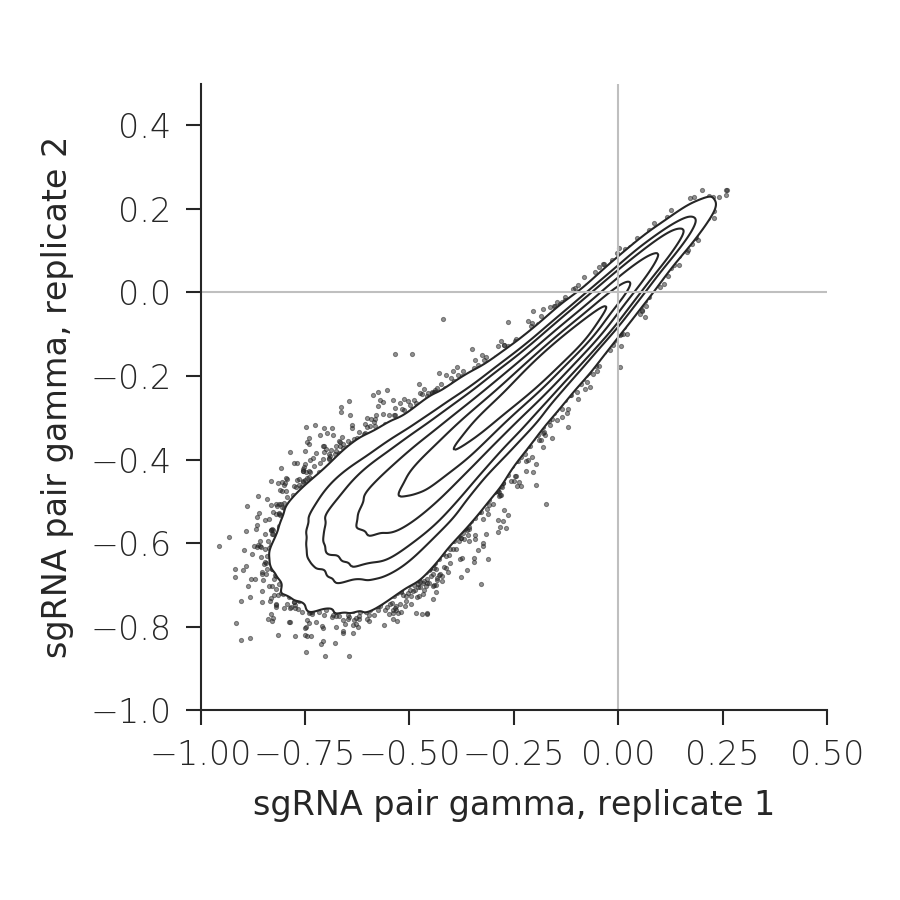

In [27]:
fig, axis = plotContourFromScatter(log2es_rep1.loc[sgIntersect], log2es_rep2.loc[sgIntersect],
                       xlabel = 'sgRNA pair gamma, replicate 1', ylabel = 'sgRNA pair gamma, replicate 2')

axis.set_xlim((-1,.5))
axis.set_ylim((-1,.5))

plt.tight_layout()

Image(saveFigures(fig, 'Doubles_Libraries/figs_part2/', 'replicate_phenotypes'))

In [28]:
phenotypeMatrix, singlesTable, singlePhenotypes = generatePhenotypeMatrix(log2es_repave)
phenotypeMatrix_abba, singlePhenotypes_abba = abbaAveragePhenotypes(phenotypeMatrix, singlesTable)
emap1, emap2, emap_quad_std = calculateInteractions(phenotypeMatrix_abba, singlePhenotypes_abba, singlesTable, quadFitForceIntercept, zstandardize=True)
emap_quad_std_gene = generateGeneMap(emap_quad_std, singlesTable)
len(emap_quad_std_gene)

113

In [29]:
sgIntersect = set(log2es_rep1.index).intersection(log2es_rep2.index)
phenotypeMatrix_rep1, singlesTable_rep1, singlePhenotypes_rep1 = generatePhenotypeMatrix(log2es_rep1.loc[sgIntersect])
phenotypeMatrix_rep1_abba, singlePhenotypes_rep1_abba = abbaAveragePhenotypes(phenotypeMatrix_rep1, singlesTable_rep1)
emap1, emap2, emap_quad_std_rep1 = calculateInteractions(phenotypeMatrix_rep1_abba, singlePhenotypes_rep1_abba, singlesTable_rep1, quadFitForceIntercept, zstandardize=True)
phenotypeMatrix_rep2, singlesTable_rep2, singlePhenotypes_rep2 = generatePhenotypeMatrix(log2es_rep2.loc[sgIntersect])
phenotypeMatrix_rep2_abba, singlePhenotypes_rep2_abba = abbaAveragePhenotypes(phenotypeMatrix_rep2, singlesTable_rep1)
emap1, emap2, emap_quad_std_rep2 = calculateInteractions(phenotypeMatrix_rep2_abba, singlePhenotypes_rep2_abba, singlesTable_rep2, quadFitForceIntercept, zstandardize=True)

In [30]:
#have to use dropna=FALSE on stack, otherwise will secretly drop nans and upper triangle will not behave as expected!!
def upperTriangle(matrix, k=1):
    keep = np.triu(np.ones(matrix.shape), k=k).astype('bool').reshape(matrix.size)
    return matrix.stack(dropna=False).loc[keep]

In [31]:
paired_all = brewer2mpl.get_map('paired','qualitative',10).mpl_colors

Doubles_Libraries/figs_crispra/png/055fig_replicate_GIcorr.png


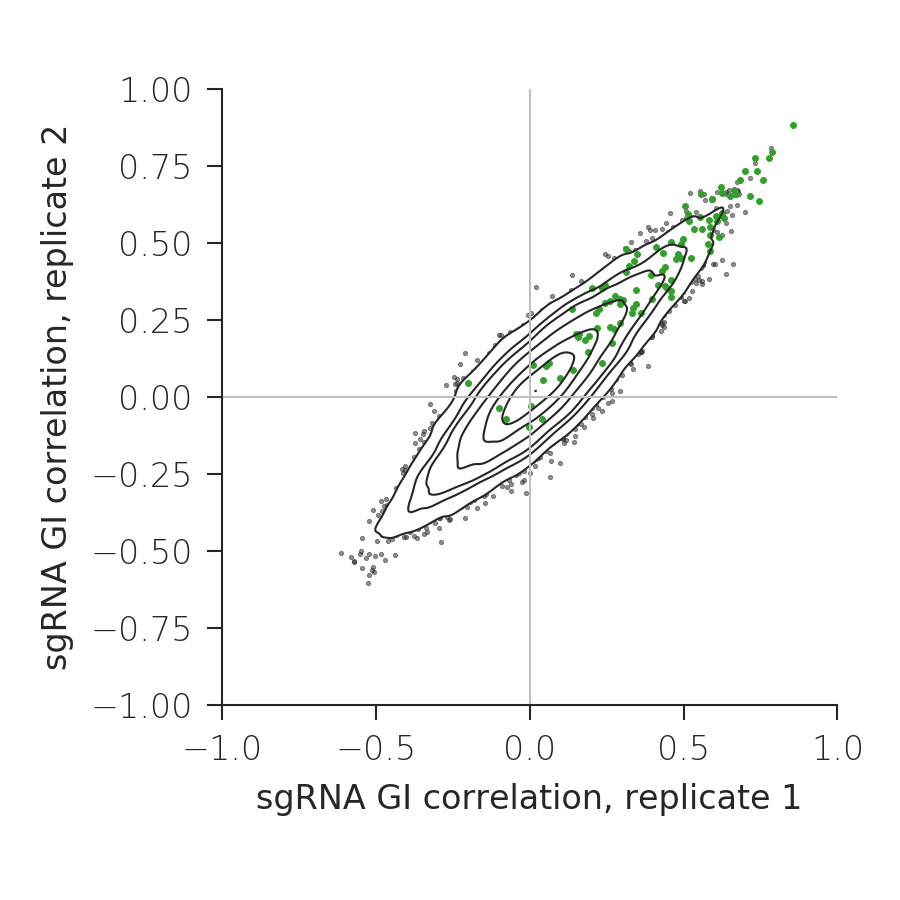

In [33]:
fig, axis = plotContourFromScatter(upperTriangle(calculateCorrelationMatrix(emap_quad_std_rep1.loc[singlesTable['gene'] != 'negative',singlesTable['gene'] != 'negative'])).values,
                upperTriangle(calculateCorrelationMatrix(emap_quad_std_rep2.loc[singlesTable['gene'] != 'negative',singlesTable['gene'] != 'negative'])).values,
               xlabel = 'sgRNA GI correlation, replicate 1', ylabel = 'sgRNA GI correlation, replicate 2')

corrMatrix_rep1 = calculateCorrelationMatrix(emap_quad_std_rep1.loc[singlesTable['gene'] != 'negative',singlesTable['gene'] != 'negative'])
sameGeneCorrs_rep1, negCorrs_rep1 = calculateIntrageneCorrelation(corrMatrix_rep1, singlePhenotypes, singlesTable.loc[singlesTable['gene'] != 'negative'])
# sameComplexCorrs_rep1 = calculateIntracomplexCorrelation_sgRNA(corrMatrix_rep1, singlePhenotypes, singlesTable, complexDict)

corrMatrix_rep2 = calculateCorrelationMatrix(emap_quad_std_rep2.loc[singlesTable['gene'] != 'negative',singlesTable['gene'] != 'negative'])
sameGeneCorrs_rep2, negCorrs_rep2 = calculateIntrageneCorrelation(corrMatrix_rep2, singlePhenotypes, singlesTable.loc[singlesTable['gene'] != 'negative'])
# sameComplexCorrs_rep2 = calculateIntracomplexCorrelation_sgRNA(corrMatrix_rep2, singlePhenotypes, singlesTable, complexDict)

# axis.scatter(zip(*sameComplexCorrs_rep1)[4], zip(*sameComplexCorrs_rep2)[4], s=2, c=paired_all[9], rasterized=True)
axis.scatter(zip(*sameGeneCorrs_rep1)[4], zip(*sameGeneCorrs_rep2)[4], s=2, c=paired_all[3], rasterized=True)

# axis.scatter(-.4, .6, s=2, c=paired_all[9])
# axis.scatter(-.4, .55, s=2, c=paired_all[3])

# axis.set_xlim((-0.5,0.75))
# axis.set_ylim((-0.5,0.75))

plt.tight_layout()

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/', 'replicate_GIcorr'))

In [34]:
!mkdir Doubles_Libraries/CRISPRa_final_analysis/filter_15

In [35]:
filenameRoot = 'Doubles_Libraries/CRISPRa_final_analysis/filter_15/CRISPRa_K562_'

log2es_rep1.to_csv(filenameRoot + 'replicate1_allphenotypes.txt',sep='\t')
log2es_rep2.to_csv(filenameRoot + 'replicate2_allphenotypes.txt',sep='\t')

phenotypeMatrix.to_csv(filenameRoot + 'replicateAverage_phenotypeMatrix.txt',sep='\t')
phenotypeMatrix_abba.to_csv(filenameRoot + 'replicateAverage_phenotypeMatrix_abbaAveraged.txt',sep='\t')
singlePhenotypes.to_csv(filenameRoot + 'replicateAverage_singlePhenotypes.txt',sep='\t')
singlePhenotypes_abba.to_csv(filenameRoot + 'replicateAverage_singlePhenotypes_abbaAveraged.txt',sep='\t')
singlesTable.to_csv(filenameRoot + 'sgRNA_to_gene.txt',sep='\t')

phenotypeMatrix_rep1.to_csv(filenameRoot + 'replicate1_phenotypeMatrix.txt',sep='\t')
phenotypeMatrix_rep1_abba.to_csv(filenameRoot + 'replicate1_phenotypeMatrix_abbaAveraged.txt',sep='\t')
singlePhenotypes_rep1.to_csv(filenameRoot + 'replicate1_singlePhenotypes.txt',sep='\t')
singlePhenotypes_rep1_abba.to_csv(filenameRoot + 'replicate1_singlePhenotypes_abbaAveraged.txt',sep='\t')

phenotypeMatrix_rep2.to_csv(filenameRoot + 'replicate2_phenotypeMatrix.txt',sep='\t')
phenotypeMatrix_rep2_abba.to_csv(filenameRoot + 'replicate2_phenotypeMatrix_abbaAveraged.txt',sep='\t')
singlePhenotypes_rep2.to_csv(filenameRoot + 'replicate2_singlePhenotypes.txt',sep='\t')
singlePhenotypes_rep2_abba.to_csv(filenameRoot + 'replicate2_singlePhenotypes_abbaAveraged.txt',sep='\t')

In [36]:
emap_quad_std.to_csv(filenameRoot + 'emap_sgRNA_wnegs.txt',sep='\t')
emap_quad_std.loc[singlesTable['gene'] != 'negative', singlesTable['gene'] != 'negative'].to_csv(filenameRoot + 'emap_sgRNA_nonegs.txt',sep='\t')

emap_quad_std_gene.loc[emap_quad_std_gene.apply(lambda row: row.name != 'negative', axis=1),emap_quad_std_gene.apply(lambda row: row.name != 'negative', axis=1)].to_csv(filenameRoot + 'emap_gene.txt',sep='\t')

In [38]:
summedCountsTable.loc[doublesTable['name_a'] == 'MAP4K3_+_39664546.23-P1P2'].head()

barcode                 \
                                                       cyc        t0        
                                                      rep1 rep2 rep1 rep2   
combined name                                                               
MAP4K3_+_39664546.23-P1P2++AHR_-_17338168.23-P1P2        0    0    0    0   
MAP4K3_+_39664546.23-P1P2++AHR_-_17338164.23-P1P2        0    0    0    0   
MAP4K3_+_39664546.23-P1P2++ARID1A_+_27022167.23...       0    0    0    0   
MAP4K3_+_39664546.23-P1P2++ARID1A_-_27022243.23...       0    0    0    0   
MAP4K3_+_39664546.23-P1P2++ARRDC3_-_90679309.23...       0    0    0    0   

                                                   sgRNA                 \
                                                     cyc        t0        
                                                    rep1 rep2 rep1 rep2   
combined name                                                             
MAP4K3_+_39664546.23-P1P2++AHR_-_17338168.23-P1P2      0    0    0    0   
MAP4K3_+_39664546.23-P1P2++AHR_-_17338164.23-P1P2      0    0    0    0   
MAP4K3_+_39664546.23-P1P2++ARID1A_+_27022167.23...     0    0    0    0   
MAP4K3_+_39664546.23-P1P2++ARID1A_-_27022243.23...     0    0    0    0   
MAP4K3_+_39664546.23-P1P2++ARRDC3_-_90679309.23...     0    0    0    0   

                                                   tripleseq                 
                                                         cyc        t0       
                                                        rep1 rep2 rep1 rep2  
combined name                                                                
MAP4K3_+_39664546.23-P1P2++AHR_-_17338168.23-P1P2          0    0    0    0  
MAP4K3_+_39664546.23-P1P2++AHR_-_17338164.23-P1P2          0    0    0    0  
MAP4K3_+_39664546.23-P1P2++ARID1A_+_27022167.23...         0    0    0    0  
MAP4K3_+_39664546.23-P1P2++ARID1A_-_27022243.23...         0    0    0    0  
MAP4K3_+_39664546.23-P1P2++ARRDC3_-_90679309.23...         0    0    0    0

In [41]:
summedCountsTable.groupby(doublesTable['name_a']).agg(np.median).sort_values(('tripleseq','t0','rep1')).head(10)

barcode                sgRNA                 \
                              cyc        t0        cyc        t0        
                             rep1 rep2 rep1 rep2  rep1 rep2 rep1 rep2   
name_a                                                                  
negative_control_5              0    0    0    0     0    0    0    0   
MAP4K3_+_39664546.23-P1P2       0    0    0    0     0    0    0    0   
SNAI1_+_48599301.23-P1P2        0    0    0    0     5    3   48   55   
HES7_-_8027532.23-P1P2          0    0    0    0     1    1   29   34   
PEG10_+_94285507.23-P1          0    0    0    0    18   15   51   63   
ISL2_+_76628878.23-P1P2         0    0    0    0    76   51   93  111   
FEV_+_219850574.23-P1P2        12   11   29   36    12   12   38   47   
CDKN1B_+_12869867.23-P1P2      74   71  179  211    69   67  209  252   
CDKN1C_-_2907198.23-P1P2       42   43  189  227    38   40  229  280   
COL1A1_+_48279052.23-P1P2      31   32  202  227    27   26  310  344   

                          tripleseq                 
                                cyc        t0       
                               rep1 rep2 rep1 rep2  
name_a                                              
negative_control_5                0    0    0    0  
MAP4K3_+_39664546.23-P1P2         0    0    0    0  
SNAI1_+_48599301.23-P1P2          0    0    0    0  
HES7_-_8027532.23-P1P2            0    0    0    0  
PEG10_+_94285507.23-P1            0    0    0    0  
ISL2_+_76628878.23-P1P2           0    0    0    0  
FEV_+_219850574.23-P1P2           7    7   23   27  
CDKN1B_+_12869867.23-P1P2        43   44  129  159  
CDKN1C_-_2907198.23-P1P2         23   25  145  174  
COL1A1_+_48279052.23-P1P2        13   13  155  177

## Repeat analysis at lower filter threshold 

#### some sgRNAs included in perturb-seq had poor representation at endpoint of GI map due to strong phenotype

In [42]:
log2es_rep1 = calcLog2e_cycledonly(summedCountsTable[('tripleseq','t0','rep1')],
                                   summedCountsTable[('tripleseq','cyc','rep1')],
                                   doublesTable,
                                   filterThreshold=1,
                                   pseudocount=10,
                                  doublingDifferences=growthValues['CRISPRa Rep1'])

53824 pairs of 57121 passing filter


In [43]:
log2es_rep2 = calcLog2e_cycledonly(summedCountsTable[('tripleseq','t0','rep2')],
                                   summedCountsTable[('tripleseq','cyc','rep2')],
                                   doublesTable,
                                   filterThreshold=1,
                                   pseudocount=10,
                                  doublingDifferences=growthValues['CRISPRa Rep2'])

53824 pairs of 57121 passing filter


In [44]:
sgIntersect = set(log2es_rep1.index).intersection(log2es_rep2.index)
print len(sgIntersect)
log2es_repave = ((log2es_rep1 + log2es_rep2) / 2).loc[sgIntersect]

53824


In [45]:
phenotypeMatrix, singlesTable, singlePhenotypes = generatePhenotypeMatrix(log2es_repave)
phenotypeMatrix_abba, singlePhenotypes_abba = abbaAveragePhenotypes(phenotypeMatrix, singlesTable)
emap1, emap2, emap_quad_std = calculateInteractions(phenotypeMatrix_abba, singlePhenotypes_abba, singlesTable, quadFitForceIntercept, zstandardize=True)
emap_quad_std_gene = generateGeneMap(emap_quad_std, singlesTable)
len(emap_quad_std_gene)

113

In [46]:
sgIntersect = set(log2es_rep1.index).intersection(log2es_rep2.index)
phenotypeMatrix_rep1, singlesTable_rep1, singlePhenotypes_rep1 = generatePhenotypeMatrix(log2es_rep1.loc[sgIntersect])
phenotypeMatrix_rep1_abba, singlePhenotypes_rep1_abba = abbaAveragePhenotypes(phenotypeMatrix_rep1, singlesTable_rep1)
emap1, emap2, emap_quad_std_rep1 = calculateInteractions(phenotypeMatrix_rep1_abba, singlePhenotypes_rep1_abba, singlesTable_rep1, quadFitForceIntercept, zstandardize=True)
phenotypeMatrix_rep2, singlesTable_rep2, singlePhenotypes_rep2 = generatePhenotypeMatrix(log2es_rep2.loc[sgIntersect])
phenotypeMatrix_rep2_abba, singlePhenotypes_rep2_abba = abbaAveragePhenotypes(phenotypeMatrix_rep2, singlesTable_rep1)
emap1, emap2, emap_quad_std_rep2 = calculateInteractions(phenotypeMatrix_rep2_abba, singlePhenotypes_rep2_abba, singlesTable_rep2, quadFitForceIntercept, zstandardize=True)

In [47]:
!mkdir Doubles_Libraries/CRISPRa_final_analysis/filter_1

In [49]:
filenameRoot = 'Doubles_Libraries/CRISPRa_final_analysis/filter_1/CRISPRa_K562_'

log2es_rep1.to_csv(filenameRoot + 'replicate1_allphenotypes.txt',sep='\t')
log2es_rep2.to_csv(filenameRoot + 'replicate2_allphenotypes.txt',sep='\t')

phenotypeMatrix.to_csv(filenameRoot + 'replicateAverage_phenotypeMatrix.txt',sep='\t')
phenotypeMatrix_abba.to_csv(filenameRoot + 'replicateAverage_phenotypeMatrix_abbaAveraged.txt',sep='\t')
singlePhenotypes.to_csv(filenameRoot + 'replicateAverage_singlePhenotypes.txt',sep='\t')
singlePhenotypes_abba.to_csv(filenameRoot + 'replicateAverage_singlePhenotypes_abbaAveraged.txt',sep='\t')
singlesTable.to_csv(filenameRoot + 'sgRNA_to_gene.txt',sep='\t')

phenotypeMatrix_rep1.to_csv(filenameRoot + 'replicate1_phenotypeMatrix.txt',sep='\t')
phenotypeMatrix_rep1_abba.to_csv(filenameRoot + 'replicate1_phenotypeMatrix_abbaAveraged.txt',sep='\t')
singlePhenotypes_rep1.to_csv(filenameRoot + 'replicate1_singlePhenotypes.txt',sep='\t')
singlePhenotypes_rep1_abba.to_csv(filenameRoot + 'replicate1_singlePhenotypes_abbaAveraged.txt',sep='\t')

phenotypeMatrix_rep2.to_csv(filenameRoot + 'replicate2_phenotypeMatrix.txt',sep='\t')
phenotypeMatrix_rep2_abba.to_csv(filenameRoot + 'replicate2_phenotypeMatrix_abbaAveraged.txt',sep='\t')
singlePhenotypes_rep2.to_csv(filenameRoot + 'replicate2_singlePhenotypes.txt',sep='\t')
singlePhenotypes_rep2_abba.to_csv(filenameRoot + 'replicate2_singlePhenotypes_abbaAveraged.txt',sep='\t')

In [50]:
emap_quad_std.to_csv(filenameRoot + 'emap_sgRNA_wnegs.txt',sep='\t')
emap_quad_std.loc[singlesTable['gene'] != 'negative', singlesTable['gene'] != 'negative'].to_csv(filenameRoot + 'emap_sgRNA_nonegs.txt',sep='\t')

emap_quad_std_gene.loc[emap_quad_std_gene.apply(lambda row: row.name != 'negative', axis=1),emap_quad_std_gene.apply(lambda row: row.name != 'negative', axis=1)].to_csv(filenameRoot + 'emap_gene.txt',sep='\t')

In [51]:
perturbseq_guides = '''AHR_-_17338164.23-P1P2
ARID1A_+_27022167.23-P1P2
ARRDC3_-_90679309.23-P1P2
ATL1_+_50999374.23-P1P2
BAK1_-_33548176.23-P1P2
BCL2L11_+_111878321.23-P1
BCORL1_+_129116290.23-P1P2
BPGM_+_134331476.23-P1P2
C19orf26_+_1238161.23-P1P2
C3orf72_-_138665944.23-P1P2
CBFA2T3_+_89043662.23-P2
CBL_-_119076622.23-P1P2
CDKN1A_+_36646320.23-P1P2
CDKN1B_+_12869867.23-P1P2
CDKN1C_-_2907198.23-P1P2
CEBPA_+_33793774.23-P1P2
CEBPB_+_48807216.23-P1P2
CEBPE_+_23588994.23-P1P2
CELF2_+_11059740.23-P1P2
CITED1_+_71526082.23-P1
CKS1B_-_61808483.23-ENST00000600888.1
CLDN6_-_3068282.23-P1P2
CNN1_-_11649410.23-P1
CNNM4_-_97426363.23-P1P2
COL1A1_+_48279052.23-P1P2
COL2A1_+_48398427.23-P1P2
CSRNP1_+_39196217.23-P1P2
DLX2_-_172967845.23-P1P2
DUSP9_+_152912501.23-P1
EGR1_+_137800818.23-P1
ELMSAN1_-_74227099.23-P1
ETS2_+_40177604.23-P1P2
FEV_+_219850574.23-P1P2
FOSB_+_45971009.23-P1
FOXA1_-_38064583.23-P1P2
FOXA3_+_46367435.23-P1P2
FOXF1_+_86544016.23-P1P2
FOXL2_+_138666046.23-P1P2
FOXO4_-_70315963.23-P1P2
GLB1L2_+_134201679.23-P1P2
HES7_-_8027539.23-P1P2
HK2_+_75060993.23-P1P2
HNF4A_+_43029788.23-P1P2
HOXA13_+_27239889.23-P1P2
HOXB9_+_46704211.23-P1P2
HOXC13_+_54332230.23-P1P2
IER5L_+_131940785.23-P1P2
IGDCC3_+_65670566.23-P1P2
IKZF3_-_38020571.23-P1P2
IRF1_+_131826642.23-P1P2
ISL2_-_76628853.23-P1P2
JUN_+_59249990.23-P1P2
KIAA1804_-_233463315.23-P1P2
KIF18B_-_43025293.23-P1P2
KIF2C_-_45205402.23-P1P2
KLF1_+_12998353.23-P1P2
KMT2A_+_118306901.23-P1P2
LHX1_+_35293972.23-P1P2
LYL1_-_13213808.23-P1P2
MAML2_-_96076530.23-P1P2
MAP2K3_-_21187855.23-P1P2
MAP2K6_+_67410755.23-P1P2
MAP4K3_+_39664622.23-P1P2
MAP4K5_-_50999552.23-P1P2
MAP7D1_+_36621468.23-P1P2
MAPK1_+_22222272.23-P1P2
MEIS1_+_66662147.23-P1P2
MIDN_-_1248372.23-P2
NCL_-_232329555.23-P1
NIT1_+_161087799.23-P1P2
OSR2_-_99956605.23-P1P2
PLK4_+_128801906.23-P1P2
POU3F2_-_99282213.23-P1P2
PRDM1_-_106534101.23-P1P2
PRTG_+_56035430.23-P1P2
PTPN1_-_49126654.23-P1P2
PTPN12_-_77166524.23-P1P2
PTPN13_-_87515370.23-P1P2
PTPN9_-_75871826.23-P1P2
RHOXF2_+_119292286.23-ENST00000371388.3
RHOXF2B_-_119211886.23-ENST00000371402.2
RREB1_+_7107890.23-P1P2
RUNX1T1_+_93115606.23-P2
S1PR2_+_10342062.23-P1P2
SAMD1_+_14201736.23-P1P2
SET_+_131451355.23-P1P2
SGK1_-_134496214.23-P1
SLC4A1_+_42345604.23-P1P2
SLC6A9_+_44497266.23-P1P2
SNAI1_+_48599338.23-P1P2
SPI1_+_47400397.23-P1P2
STIL_-_47780136.23-P1P2
TBX2_+_59477100.23-P1P2
TBX3_-_115122232.23-P1P2
TGFBR2_-_30647920.23-P1P2
TMSB4X_+_12993106.23-P1
TP73_-_3568729.23-P1P2
TSC22D1_-_45011354.23-P1P2
UBASH3A_+_43823772.23-P1P2
UBASH3B_-_122526266.23-P1P2
ZBTB1_+_64970303.23-P1P2
ZBTB10_+_81398318.23-P1P2
ZBTB25_-_64971449.23-P1P2
ZC3HAV1_+_138794578.23-P1P2
ZNF318_+_43337335.23-P1P2'''.split('\n')
len(perturbseq_guides)

105

In [52]:
emap_sg_perturbseq = emap_quad_std.loc[perturbseq_guides,perturbseq_guides].dropna(axis=0, how='all').dropna(axis=1, how='all')
emap_sg_perturbseq.values.shape

(104, 104)

In [53]:
emap_sg_perturbseq.to_csv(filenameRoot + 'emap_sgRNA_perturbseqguides.txt',sep='\t')